# <center>**EDA - Consumidor.gov.br**</center>

Projeto de Análise Exploratória de Dados dos registros de reclamações de consumidores brasileiros, sobre um produto ou serviço adquirido, feitas no portal Consumidor.gov.br no ano de 2019. O serviço é oferecido pela Secretaria Nacional do Consumidor, do Ministério da Justiça, e os dados são abertos e disponibilizados  no site <a href="http://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1">Dados.gov.br</a>.

# ***Importação das bibliotecas***

In [1]:
# Importando as bibliotecas:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ***Importação dos dados***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Diretório dos arquivos dataset
semestre1 = '/content/drive/MyDrive/Colab Notebooks/Datasets/Consumidor_2019/2019-1-semestre.csv'
semestre2 = '/content/drive/MyDrive/Colab Notebooks/Datasets/Consumidor_2019/2019-2-semestre.csv'

In [4]:
# Leitura do dataset com os dados do primeiro semestre de 2019
dados_consumidor = pd.read_csv(semestre1, sep=';', 
                               encoding='utf-8', parse_dates=['Data Finalização'])

In [5]:
# Leitura do dataset com os dados do segundo semestre de 2019
dados_consumidor = pd.concat([dados_consumidor, 
                              pd.read_csv(semestre2, sep=';', 
                                          encoding='latin1', parse_dates=['Data Finalização'])])

In [6]:
# Resetando os valores do index
dados_consumidor.reset_index(drop=True)

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,SE,SP,Francisco Morato,M,entre 21 a 30 anos,2019-04-01,10.0,Banco do Brasil,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Conta corrente / Salário / Poupança /Conta Apo...,Vício de Qualidade,Dificuldade para alterar/ ativar serviços,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
1,S,RS,Porto Alegre,F,entre 61 a 70 anos,2019-01-01,10.0,Mercado Pago,Empresas de Pagamento Eletrônico,Serviços Financeiros,Serviço de pagamento online/ via celular/ maqu...,Atendimento / SAC,Dificuldade de contato / demora no atendimento,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
2,SE,SP,São Vicente,F,entre 41 a 50 anos,2019-03-01,9.0,Banco do Brasil,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1
3,NE,PE,Paulista,M,entre 31 a 40 anos,2019-02-01,10.0,Banco do Brasil,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Conta corrente / Salário / Poupança /Conta Apo...,Contrato / Oferta,Dificuldade para contratar / recusa injustificada,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
4,SE,SP,São Bernardo do Campo,F,entre 31 a 40 anos,2019-02-01,7.0,Banco Itaú Unibanco,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado (Empréstimo descontado em f...,Cobrança / Contestação,"Cálculo de juros, saldo devedor (contestação, ...",Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780174,SE,SP,São Paulo,M,entre 31 a 40 anos,2019-12-20,3.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança após cancelamento do serviço,Telefone,S,S,Finalizada avaliada,Não Resolvida,1.0,1
780175,SE,SP,São Paulo,F,entre 31 a 40 anos,2019-12-27,3.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pré-paga,Cobrança / Contestação,"Negativação indevida (SPC, Serasa, SCPC etc)",Internet,S,S,Finalizada avaliada,Resolvida,4.0,1
780176,SE,RJ,São João de Meriti,F,entre 61 a 70 anos,2019-12-21,2.0,Mercado Pago,Empresas de Pagamento Eletrônico,Serviços Financeiros,Serviço de pagamento online/ via celular/ maqu...,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
780177,SE,SP,Rio Claro,M,entre 21 a 30 anos,2019-12-27,7.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança após cancelamento do serviço,Loja física,N,S,Finalizada avaliada,Resolvida,5.0,1


In [7]:
# Excluindo a coluna Total
dados_consumidor.drop('Total', axis=1, inplace=True)

# **ADE - Comandos Básicos**

In [8]:
# Dimensão do DataFrame
dados_consumidor.shape

(780179, 19)

In [9]:
# Tipo de Dados das Colunas
dados_consumidor.dtypes

Região                            object
UF                                object
Cidade                            object
Sexo                              object
Faixa Etária                      object
Data Finalização          datetime64[ns]
Tempo Resposta                   float64
Nome Fantasia                     object
Segmento de Mercado               object
Área                              object
Assunto                           object
Grupo Problema                    object
Problema                          object
Como Comprou Contratou            object
Procurou Empresa                  object
Respondida                        object
Situação                          object
Avaliação Reclamação              object
Nota do Consumidor               float64
dtype: object

In [10]:
# Exibindo algumas linhas
dados_consumidor.head()
dados_consumidor.tail()
dados_consumidor.sample(3)

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
22234,S,PR,Pinhais,F,entre 31 a 40 anos,2019-01-24,15.0,Americanas.com,Comércio Eletrônico,Demais Produtos,Móveis e Colchões,Entrega do Produto,Produto entregue incompleto / diferente do pe...,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN
69646,SE,SP,Santos,M,entre 31 a 40 anos,2019-07-08,9.0,Oi Celular,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Móvel,Vício de Qualidade,Funcionamento inadequado do serviço (má qualid...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN
8134,SE,SP,Ibiúna,F,entre 41 a 50 anos,2019-10-01,10.0,Claro TV,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN


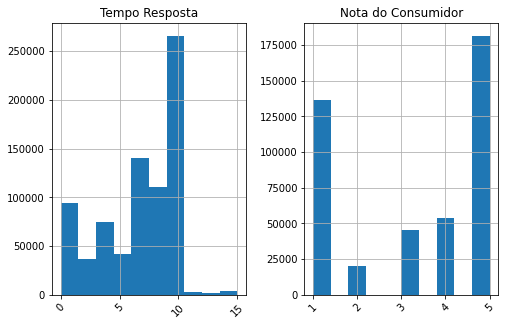

In [11]:
# Distribuição das Variáveis Numéricas
dados_consumidor.hist(figsize=(8,5), xrot=45)
plt.show()

In [12]:
# Algumas estatísticas dos dados numéricos
dados_consumidor.describe()

,Tempo Resposta,Nota do Consumidor
count,771754.000000,437616.000000
mean,6.540118,3.283397
std,3.263325,1.730530
min,0.000000,1.000000
25%,4.000000,1.000000
50%,7.000000,4.000000
75%,9.000000,5.000000
max,15.000000,5.000000


In [13]:
# Algumas estatísticas dos dados categóricos
dados_consumidor.describe(include='object')

,Região,UF,Cidade,Sexo,Faixa Etária,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação
count,780179,780179,780179,780179,780179,780179,780179,780179,780179,780179,780179,780179,780179,780179,780179,780179
unique,5,27,5408,2,7,551,38,13,121,7,157,9,2,2,2,3
top,SE,SP,São Paulo,M,entre 31 a 40 anos,Vivo - Telefônica (GVT),"Operadoras de Telecomunicações (Telefonia, Int...",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,S,Finalizada avaliada,Não Avaliada
freq,371012,216543,88130,450794,257398,71539,287507,276033,71162,336623,75833,289985,602657,771754,437571,342563


# ***EDA - Avaliação de Hipóteses***

## ***Quais estados possuem mais reclamações?***

In [14]:
estados = dados_consumidor['UF'].value_counts()

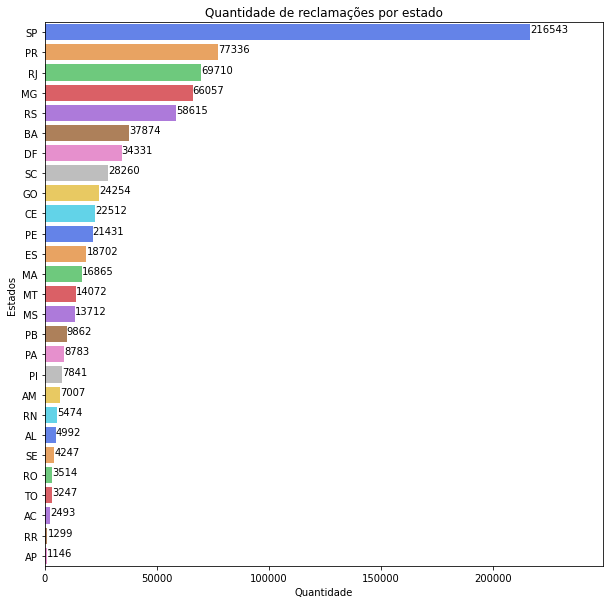

In [15]:
# Gerando o gráfico
plt.figure(figsize=(10,10))
sns.barplot(x=estados, y = estados.index, alpha=0.7, palette='bright')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Estados')
ax.set_title(label='Quantidade de reclamações por estado')
# Definindo o valor limite do eixo X em 110% do máximo valor encontrado
x_max = estados.max() * 1.15
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores
#     centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

## ***Há predominância de algum sexo nas reclamações?***

In [16]:
sexo = dados_consumidor['Sexo'].value_counts()

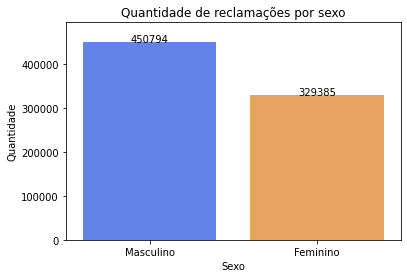

In [17]:
# Gerando o gráfico
sns.barplot(x=sexo.index, y = sexo, alpha=0.7, palette='bright')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Sexo')
ax.set_xticklabels(['Masculino', 'Feminino'])
ax.set_ylabel(ylabel='Quantidade')
ax.set_title(label='Quantidade de reclamações por sexo')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
y_max =sexo.max() * 1.1
ax.set_ylim([0, y_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores
#      centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), ha='center')
# Exibindo o gráfico
plt.show()

## ***Há predominância de faixa etária nas reclamações?***

In [18]:
faixa_etaria = dados_consumidor['Faixa Etária'].value_counts()
ordem_faixa_etaria = ['até 20 anos', 'entre 21 a 30 anos', 'entre 31 a 40 anos',
                      'entre 41 a 50 anos', 'entre 51 a 60 anos', 'entre 61 a 70 anos',
                      'mais de 70 anos']
faixa_etaria = faixa_etaria.loc[ordem_faixa_etaria]

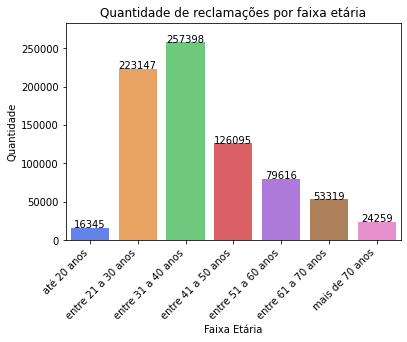

In [19]:
# Gerando o gráfico
sns.barplot(x=faixa_etaria.index, y=faixa_etaria, alpha=0.7, palette='bright')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Faixa Etária')
ax.set_xticklabels(faixa_etaria.index, rotation=45, horizontalalignment='right')
ax.set_ylabel(ylabel='Quantidade')
ax.set_title(label='Quantidade de reclamações por faixa etária')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
y_max = faixa_etaria.max() * 1.1
ax.set_ylim([0, y_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores 
#      centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), ha='center')
# Exibindo o gráfico
plt.show()

## ***Qual a reclamação mais comum?***

In [20]:
grupo_problema = dados_consumidor['Grupo Problema'].value_counts()

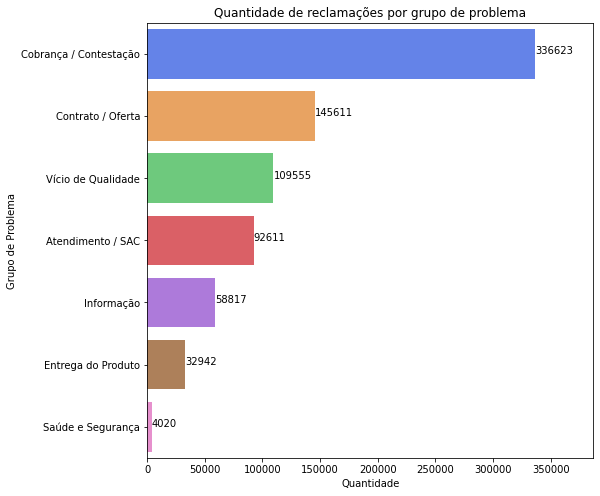

In [21]:
# Gerando o gráfico
plt.figure(figsize=(8,8))
sns.barplot(x=grupo_problema, y=grupo_problema.index, alpha=0.7, palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Grupo de Problema')
ax.set_title(label='Quantidade de reclamações por grupo de problema')
# Definindo o valor limite do eixo X em 110% do máximo valor encontrado
x_max = grupo_problema.max() * 1.15
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores 
#      centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

### ***Qual o problema que mais afetou o Grupo de Problemas "Cobrança / Constatação"?***

In [22]:
problema = dados_consumidor[dados_consumidor['Grupo Problema'] == 'Cobrança / Contestação']['Problema'].value_counts()

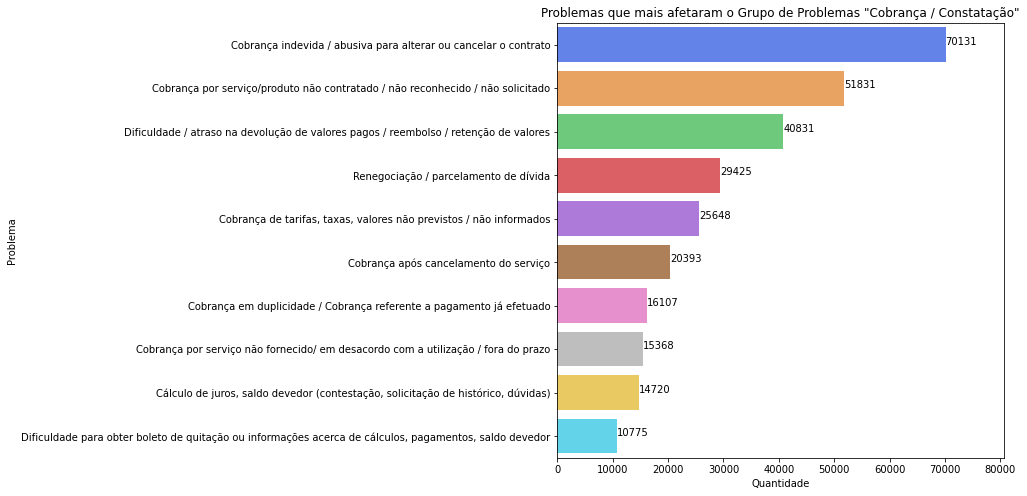

In [23]:
# Gerando o gráfico
plt.figure(figsize=(8,8))
sns.barplot(x=problema.head(10), y=problema.head(10).index, alpha=0.7, palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Problema')
ax.set_title(label='Problemas que mais afetaram o Grupo de Problemas "Cobrança / Constatação"')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = problema.head(10).max() * 1.15
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores 
#      centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

## ***Quais segmentos de mercado possuem mais reclamações?***

In [24]:
segmento_mercado = dados_consumidor['Segmento de Mercado'].value_counts()

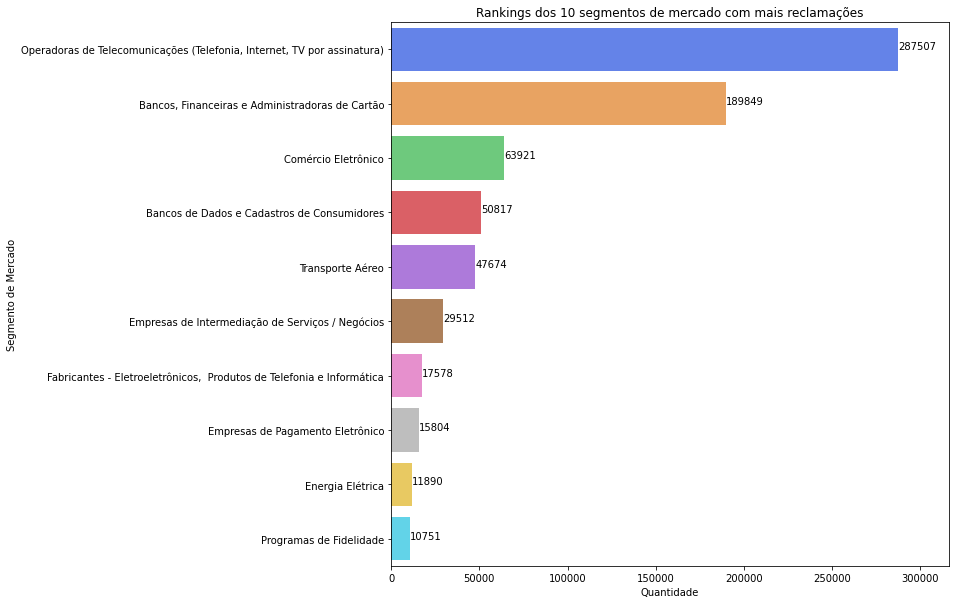

In [25]:
# Gerando o gráfico
plt.figure(figsize=(10,10))
sns.barplot(x=segmento_mercado[:10], y=segmento_mercado[:10].index, 
            alpha=0.7, palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Segmento de Mercado')
ax.set_title(label='Rankings dos 10 segmentos de mercado com mais reclamações')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = segmento_mercado.max() * 1.1
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores 
#      centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

### ***Quais os grupos de problemas que mais afetaram o segmento com mais reclamações?***

In [26]:
problema_segmento = dados_consumidor[dados_consumidor['Segmento de Mercado'] == 
                                     'Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)']
problema_segmento = problema_segmento['Problema'].value_counts()

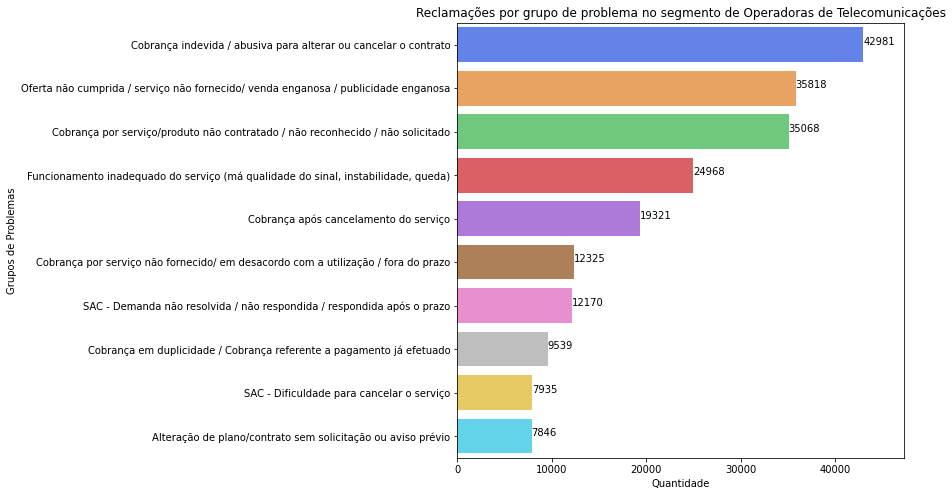

In [27]:
# Gerando o gráfico
plt.figure(figsize=(8,8))
sns.barplot(x=problema_segmento.head(10), y=problema_segmento.head(10).index, alpha=0.7, palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Grupos de Problemas')
ax.set_title(label='Reclamações por grupo de problema no segmento de Operadoras de Telecomunicações')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = problema_segmento.head(10).max() * 1.1
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores 
#      centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

## ***Quais as empresas que lideram o ranking?***

In [28]:
empresas = dados_consumidor['Nome Fantasia'].value_counts()

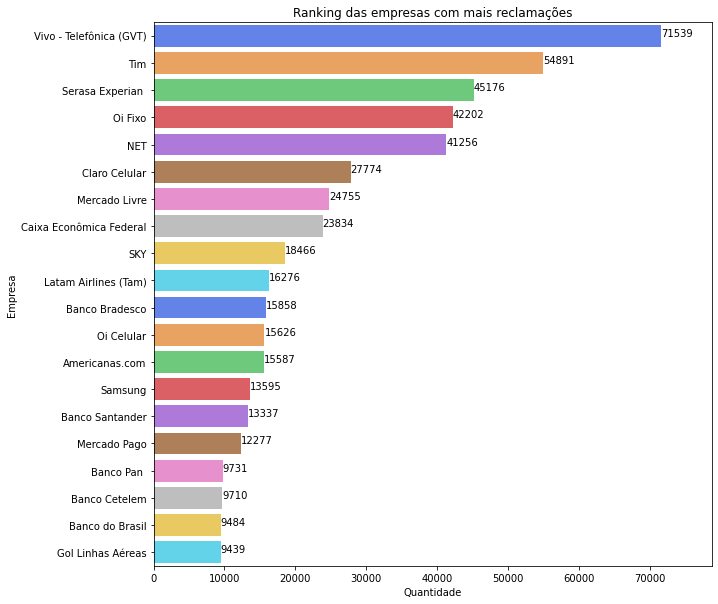

In [29]:
# Gerando o gráfico
plt.figure(figsize=(10,10))
sns.barplot(x=empresas.head(20), y=empresas.head(20).index, alpha=0.7, palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Empresa')
ax.set_title(label='Ranking das empresas com mais reclamações')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = empresas.head(20).max() * 1.1
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores 
#      centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

## ***Existe alguma relação entre o tempo de resposta e a nota do consumidor?***

In [30]:
correlacao = dados_consumidor[['Tempo Resposta', 'Nota do Consumidor']].corr()
correlacao

,Tempo Resposta,Nota do Consumidor
Tempo Resposta,1.000000,-0.079217
Nota do Consumidor,-0.079217,1.000000


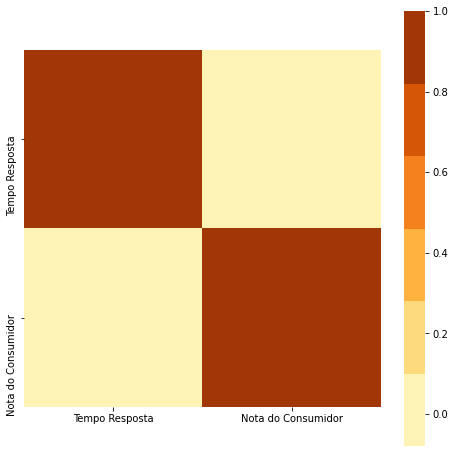

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(data = correlacao, cmap=sns.color_palette("YlOrBr"), square=True);

## ***Qual a proporção de reclamações registradas e não resolvidas?***

In [32]:
print('Reclamações registradas: ' + str(len(dados_consumidor['Avaliação Reclamação'])))
print('Reclamações resolvidas: ' + 
      str(len(dados_consumidor[dados_consumidor['Avaliação Reclamação'] == 'Não Resolvida'])))

Reclamações registradas: 780179
Reclamações resolvidas: 150522


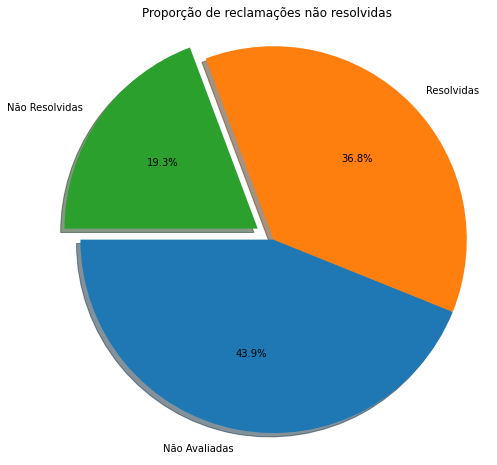

In [33]:
reclamacoes = dados_consumidor['Avaliação Reclamação'].value_counts()
labels = ['Não Avaliadas', 'Resolvidas', 'Não Resolvidas']
explode = (0, 0, 0.1) 
plt.figure(figsize=(8,8))
plt.pie(reclamacoes, labels=labels, autopct='%1.1f%%', shadow=True, 
        explode=explode, startangle=180)
plt.axis('equal')
plt.title('Proporção de reclamações não resolvidas')
plt.show()

### ***Para os 10 segmentos de mercado com mais reclamações, qual é essa proporção?***

In [34]:
reclamacoes = dados_consumidor['Segmento de Mercado'].value_counts()
reclamacoes = reclamacoes[0:10].sort_index()

In [35]:
df = dados_consumidor[dados_consumidor['Segmento de Mercado'].isin(reclamacoes.index)]
df = df[df['Avaliação Reclamação']=='Não Resolvida']
nao_resolvidas = df.groupby('Segmento de Mercado')['Segmento de Mercado'].count()

In [36]:
df = dados_consumidor[dados_consumidor['Segmento de Mercado'].isin(reclamacoes.index)]
df = df[df['Avaliação Reclamação']=='Não Avaliada']
nao_avaliadas = df.groupby('Segmento de Mercado')['Segmento de Mercado'].count()

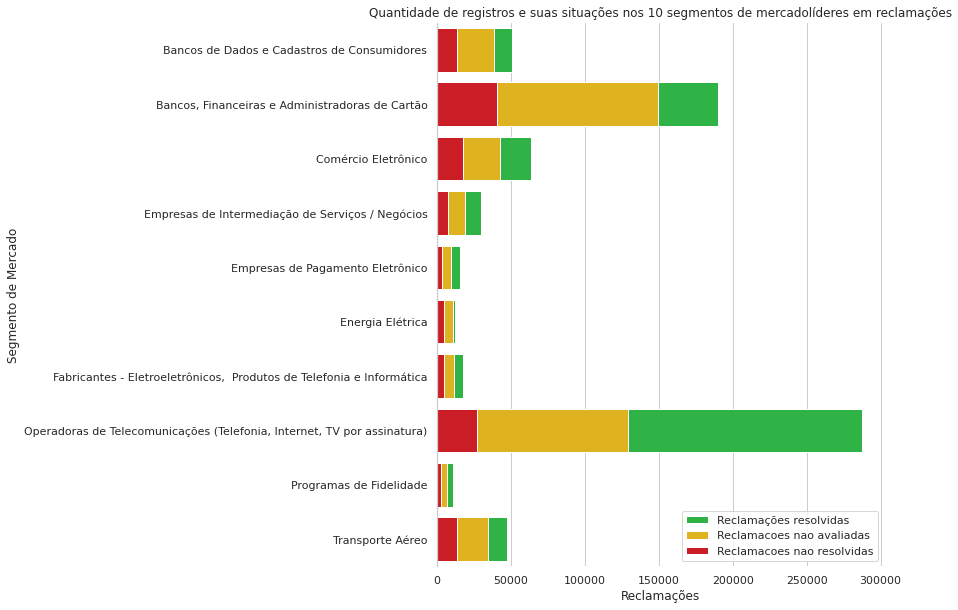

In [37]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 10))
sns.set_color_codes('bright')
sns.barplot(x=reclamacoes.values, y=reclamacoes.index, 
            label='Reclamações resolvidas', color='g')
sns.barplot(x=nao_resolvidas.values + nao_avaliadas.values, y=nao_resolvidas.index, 
            label='Reclamacoes nao avaliadas', color='y')
sns.barplot(x=nao_resolvidas.values, y=nao_resolvidas.index, 
            label='Reclamacoes nao resolvidas', color='r')
ax = plt.gca()
ax.legend(ncol=1, loc='lower right', frameon=True)
ax.set(ylabel='Segmento de Mercado', xlabel='Reclamações', 
       title = 'Quantidade de registros e suas situações nos 10 segmentos de mercado'
       + 'líderes em reclamações')
sns.despine(left=False, bottom=True)

## ***As compras/contratações realizadas por meio eletrônico geraram mais reclamações que as compras feitas em meios físicos?***

In [38]:
forma_compra = dados_consumidor['Como Comprou Contratou'].value_counts()

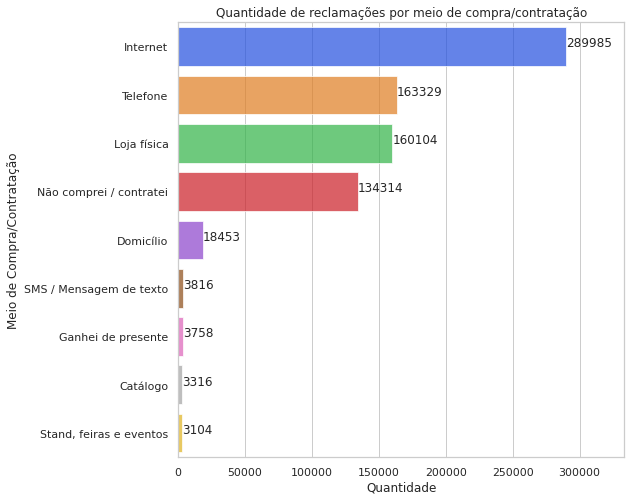

In [39]:
# Gerando o gráfico
plt.figure(figsize=(8,8))
sns.barplot(x=forma_compra, y=forma_compra.index, alpha=0.7, palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Meio de Compra/Contratação')
ax.set_title(label='Quantidade de reclamações por meio de compra/contratação')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = forma_compra.max() * 1.15
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores 
#      centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
      ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

### ***Quais segmentos tiveram mais reclamações nas compras pela Internet?***

In [40]:
internet = dados_consumidor[dados_consumidor['Como Comprou Contratou'] == 'Internet']

In [41]:
segmentos_internet = internet['Segmento de Mercado'].value_counts()

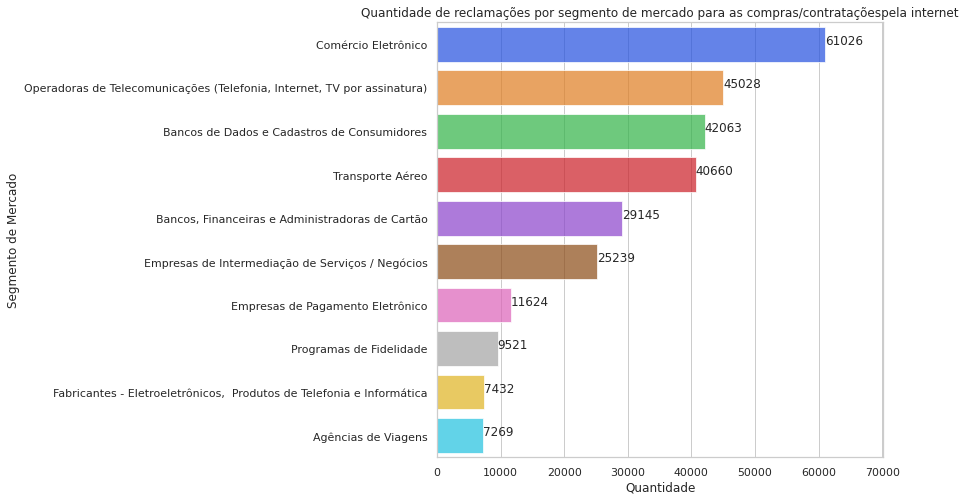

In [42]:
# Gerando o gráfico
plt.figure(figsize=(8,8))
sns.barplot(x=segmentos_internet.head(10), y=segmentos_internet.head(10).index, alpha=0.7, 
            palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Segmento de Mercado')
ax.set_title(label='Quantidade de reclamações por segmento de mercado para as compras/contratações' 
             + 'pela internet')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = segmentos_internet.head(10).max() * 1.15
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores 
#      centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
      ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

### ***Quais os problemas que mais afetaram as compras pela Internet?***

In [43]:
problema_internet = internet['Problema'].value_counts()

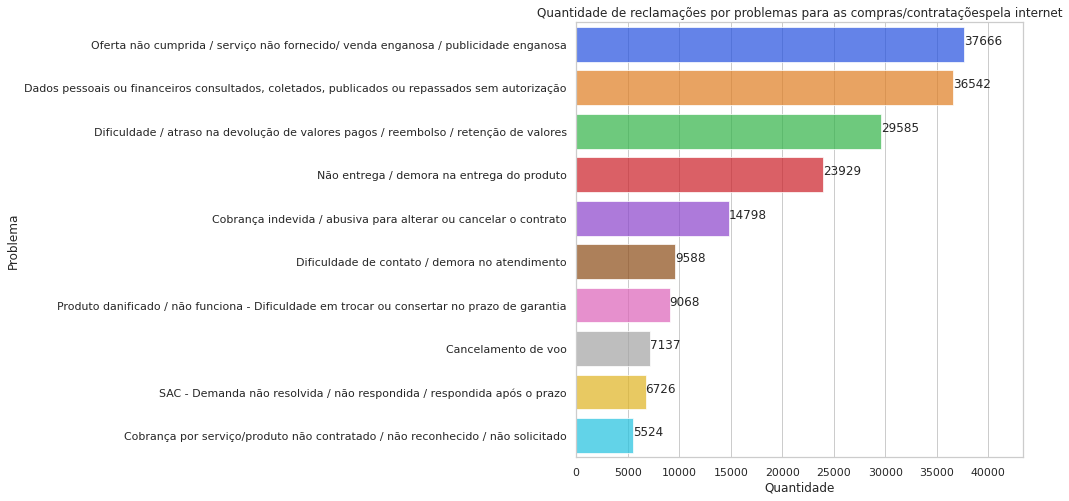

In [44]:
# Gerando o gráfico
plt.figure(figsize=(8,8))
sns.barplot(x=problema_internet.head(10), y=problema_internet.head(10).index, alpha=0.7,
            palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Problema')
ax.set_title(label='Quantidade de reclamações por problemas para as compras/contratações'
              + 'pela internet')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = problema_internet.head(10).max() * 1.15
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores
#      centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
      ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

### ***Quais as faixas etárias que mais tiveram problemas com as compras pela Internet?***

In [45]:
faixa_etaria_internet = internet['Faixa Etária'].value_counts()
faixa_etaria_internet = faixa_etaria_internet.loc[ordem_faixa_etaria]

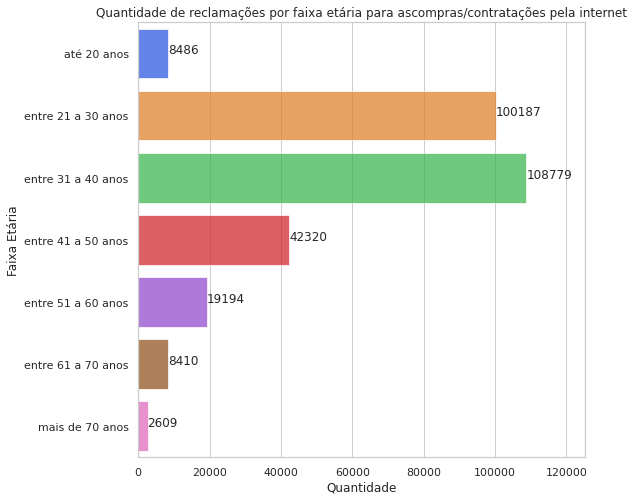

In [46]:
# Gerando o gráfico
plt.figure(figsize=(8,8))
sns.barplot(x=faixa_etaria_internet, y=faixa_etaria_internet.index, alpha=0.7, 
            palette='bright', orient='h')
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Quantidade')
ax.set_ylabel(ylabel='Faixa Etária')
ax.set_title(label='Quantidade de reclamações por faixa etária para as' 
             + 'compras/contratações pela internet')
# Definindo o valor limite do eixo Y em 110% do máximo valor encontrado
x_max = faixa_etaria_internet.max() * 1.15
ax.set_xlim([0, x_max])
# Inserindo os rótulos com os valores de cada barra 
# Parâmetros: 
#     pp.get_x() + p.get_width()/2 = posição da barra + metade da largura para exibir os valores
#      centralizados na barra
#     p.get_height() = altura da barra para posicionar os valores sobre a barra                   
for p in ax.patches:
      ax.text(p.get_width(), p.get_y() + p.get_height()/2, '%d' % int(p.get_width()), ha='left')
# Exibindo o gráfico
plt.show()

## ***Existe alguma época do ano em que há uma concentração de reclamações?***

In [47]:
dados_consumidor['Mês'] = dados_consumidor['Data Finalização'].dt.month

In [48]:
datas = dados_consumidor['Mês'].value_counts()

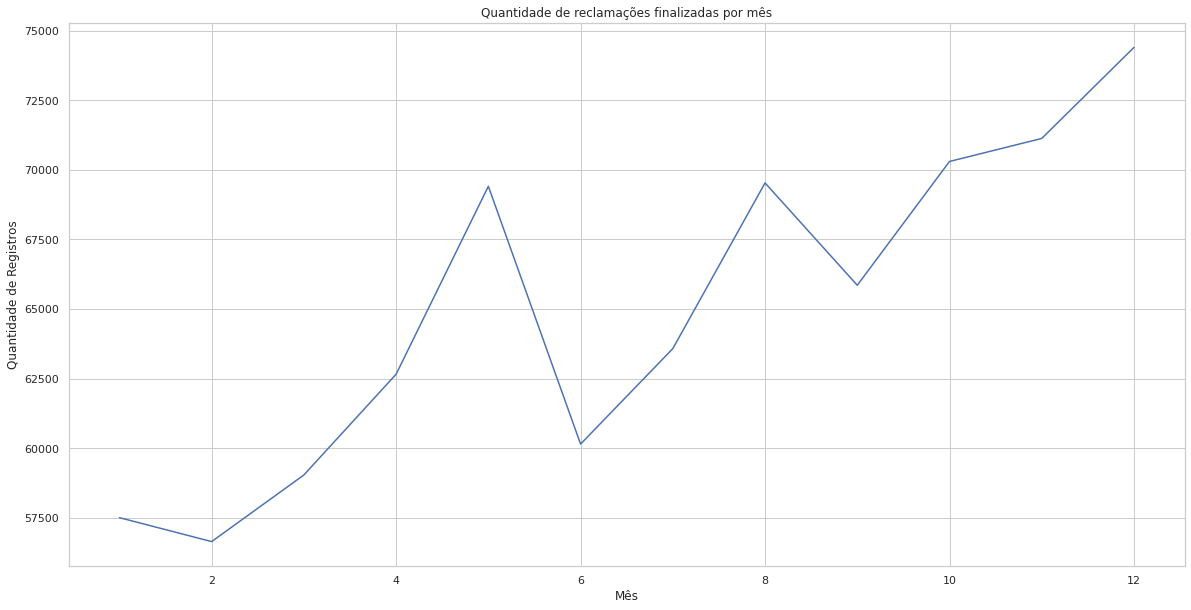

In [49]:
plt.figure(figsize=(20,10))
sns.lineplot(x=datas.index, y = datas.values)
# Obtendo o eixo do gráfico gerado
ax = plt.gca()
# Colocando as informações dos labels e título
ax.set_xlabel(xlabel='Mês')
ax.set_ylabel(ylabel='Quantidade de Registros')
ax.set_title(label='Quantidade de reclamações finalizadas por mês')
# Exibindo o gráfico
plt.show()